### Generate singular main island using perlin noise
1. Parameterize perlin noise to form relatively big clusters
2. Apply heat radius to cover up the outside spectrum
3. Run some experiments

In [2]:
import __init__
import numpy as np
from engine import Heatmap, Noise
from noises import smooth, heat

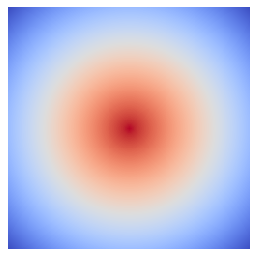

In [3]:
# Quick look at the heat function
Heatmap(heat(250, 20, 125, 125), cmap='coolwarm', scale = 0.8)

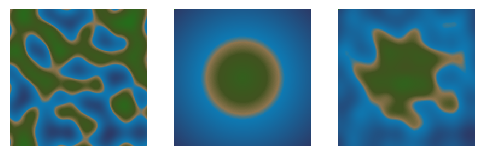

In [26]:
# Merge terrain matrices
island = smooth(5, 50)
cluster = heat(250, 17.5, 125, 125, True)
Heatmap(island, cluster, 5*cluster + island)

In [64]:
def mainland(distance, temperature, res = 50):
	island = smooth(distance, res)
	size = distance * res
	cluster = heat(size, temperature, size // 2, size // 2)
	return island + cluster

In [66]:
Noise(mainland, distance = (3, 10), temperature = (0, 30))

interactive(children=(IntSlider(value=6, description='distance', max=10, min=3), IntSlider(value=15, descripti…

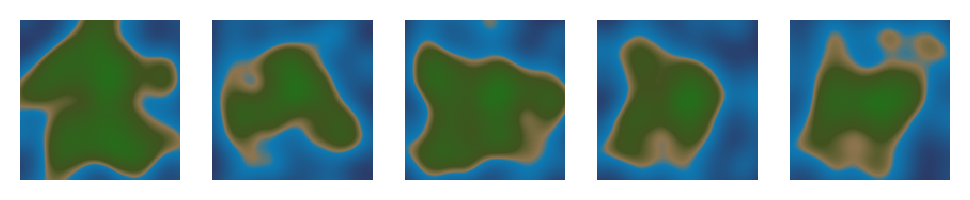

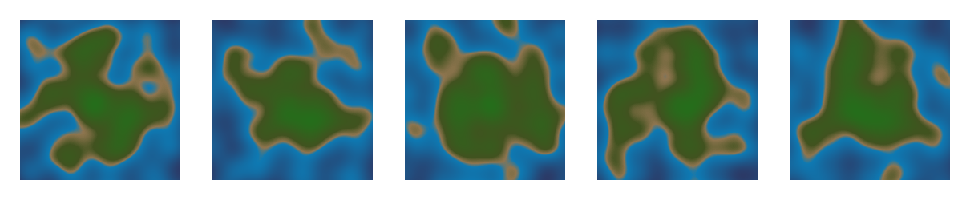

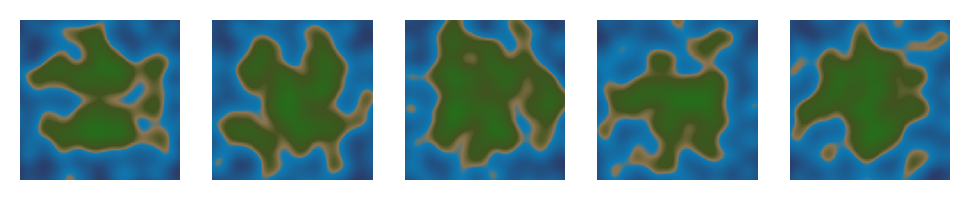

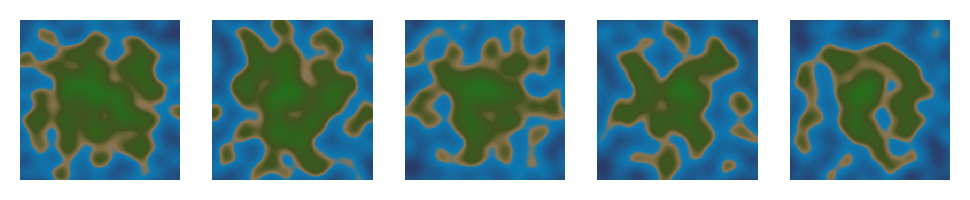

In [69]:
for d in (3, 4, 5, 6):
	Heatmap(*[mainland(d, 20) for _ in range(5)], scale = 2.0)

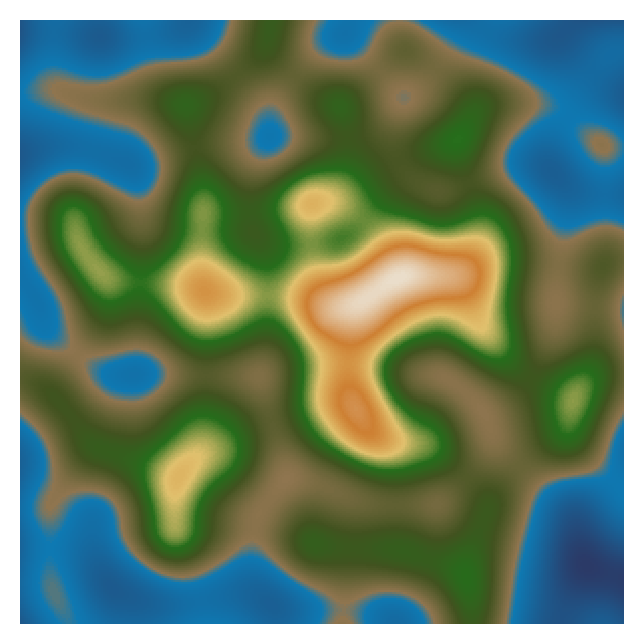

In [80]:
Heatmap(mainland(6, 20), cmap = 'mountains' , scale=2.0)

### Stacking mainlands results in smoother and more rounded shapes

In [107]:
def kland(distance, temperature, k = 2):
	return sum(mainland(distance, temperature) for _ in range(k))

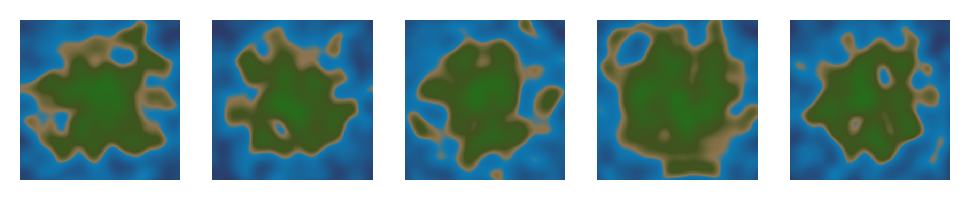

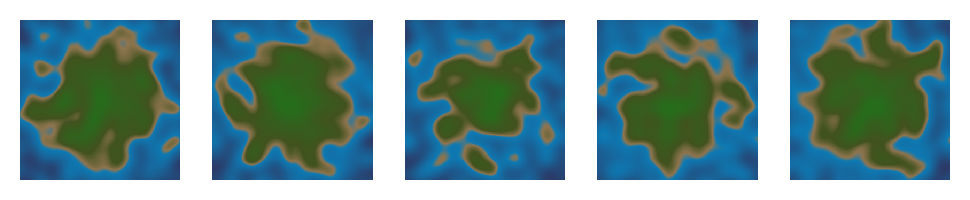

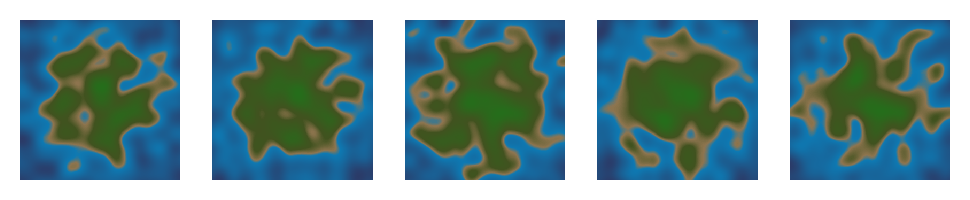

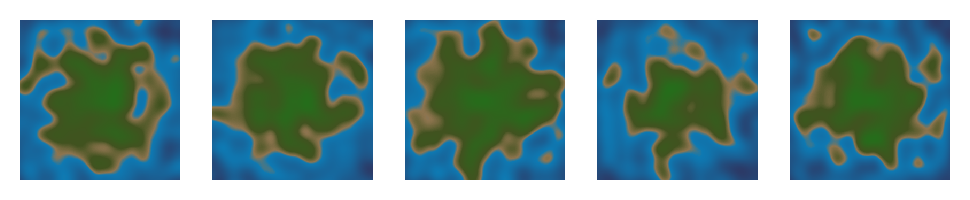

In [141]:
for k in (2, 4, 16, 64):
	Heatmap(*[kland(6, 20) for _ in range(5)], scale = 2.0)

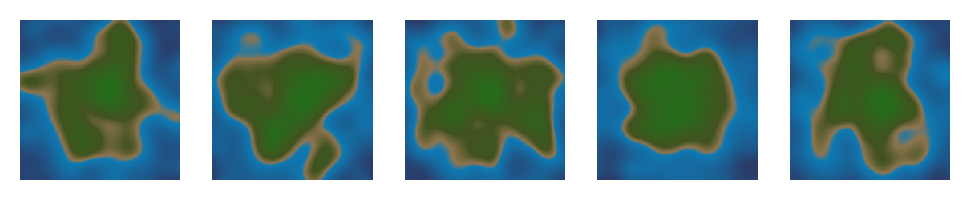

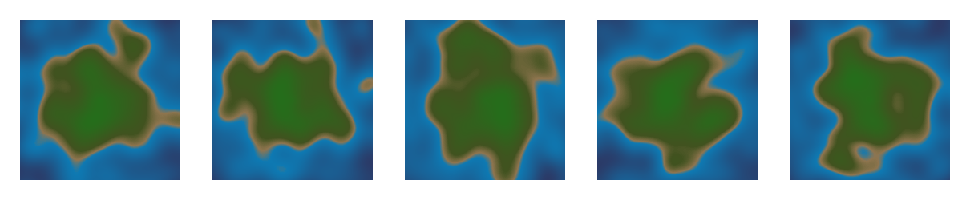

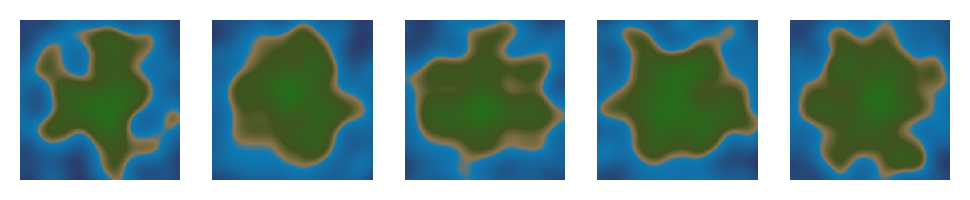

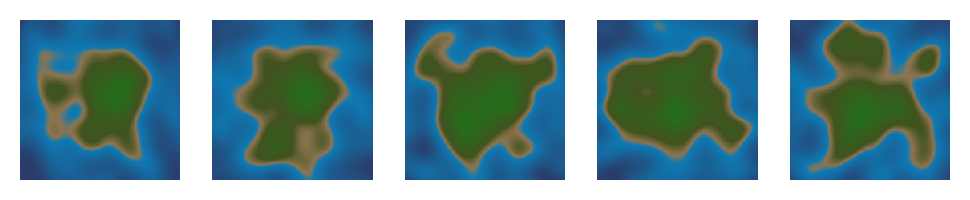

In [140]:
# More continent-like shapes
for k in (2, 4, 16, 64):
	Heatmap(*[kland(4, 20) for _ in range(5)], scale = 2.0)

### Some interesting results

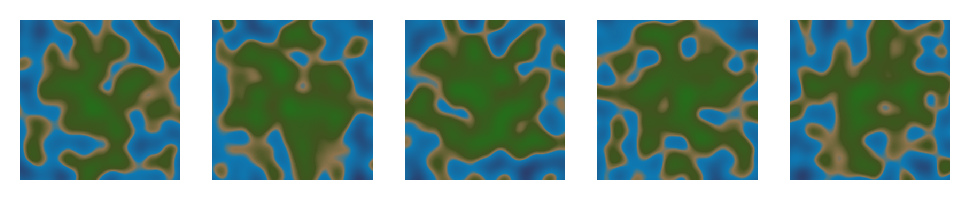

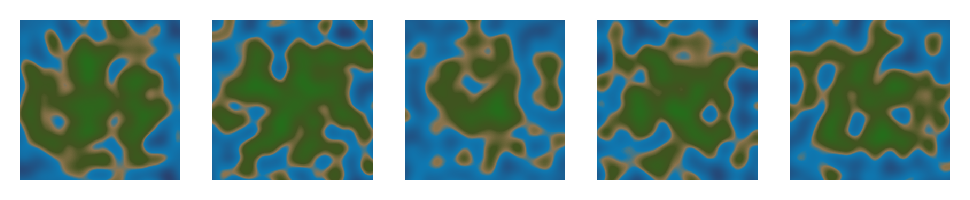

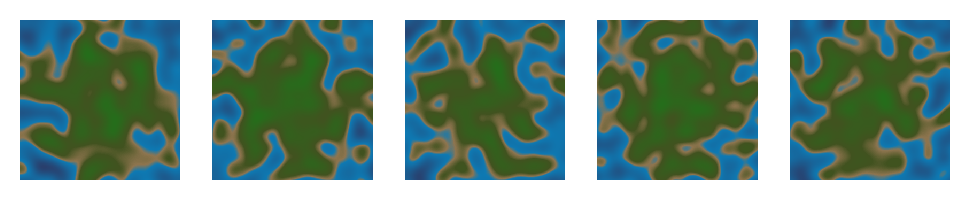

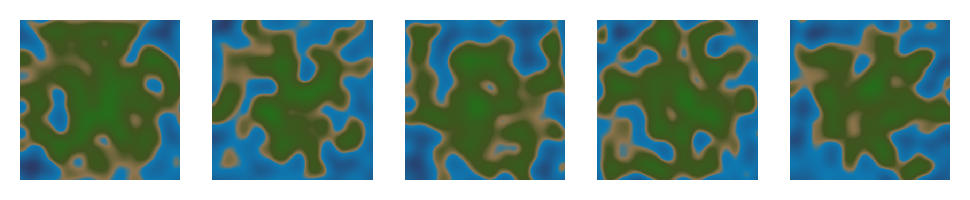

In [145]:
# Extra weirndess
for k in (2, 4, 16, 64):
	Heatmap(*[kland(6, 21) for _ in range(5)], scale = 2.0)

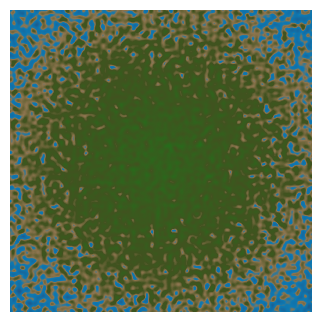

In [125]:
Heatmap( kland(50, 22, 10) )